(1.) Data Collection and Preprocessing*

In [ ]:
#import the required libraries

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
import matplotlib.pyplot as plt


# **IMDB Data Scrapping**
IMDB website data has been scrapped by using the below code.

**Difficulties:**

We faced difficulties in
Cleansing Year, Genre, Certification, Rating, Description, top_250

We were able to resolve the issues by the following code below except for the top_250 column

In [ ]:
# collect the first 200 movies

pages = np.arange(1,1000,50)
temp=[]
for page in pages:
  page =requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=" +str(page) +"&ref_=adv_nxt")
  soup = BeautifulSoup(page.text,'html.parser')
  movie_data = soup.find_all('div',class_='lister-item mode-advanced')

  sleep(randint(2,8))

  for item in movie_data:
    year =item.find('span', class_='lister-item-year text-muted unbold').text.strip()
    year_clean=str(year).replace('(','').replace(')','').replace('I','').replace(' ','')
    rating = item.find('strong').text.replace('\n','')
    time= item.find('span',class_='runtime').text.replace('\n','').replace('min','')
    genre= item.find('span',class_='genre').text.replace('\n','')
    certification=item.find('span', class_='certificate').text if item.find('span',class_='certificate') != None else np.nan
    meta=int(item.find('span', class_='metascore favorable').text.strip()) if item.find('span',class_='metascore favorable') != None else np.nan
    descr=item.find_all('p',class_='text-muted')[1].get_text().replace('\n','')
    title = item.find_all('a')[1].get_text().replace('\n','')
    dir = item.find_all('p')[2].find_all('a')[0].get_text().replace('\n','')
    votes=item.find('span', {"name":"nv"}).text.strip().replace(',','')
    a=item.find_all('span',attrs={'name':'nv'})
    gross=float(a[1].text.replace("$", "").replace("M", ""))*1000000 if len(a) > 2 else np.nan
    top_250=(item.find('p',class_='sort-num_votes-visible').find_all('span'))[7:8]

    temp.append([year_clean,rating,time,genre,certification,meta,descr,title,dir,votes,gross,top_250])




df = pd.DataFrame(temp, columns=['Year', 'Rating', 'Span(mins)', 'Genre', 'Certificate', 'Meta_Score', 'Description', 'Title', 'Director', 'Votes', 'Gross', 'Top_250'])
df['Title'] = df['Title'].str.upper()





# Writing the CSV

We have saved the scrapped data into our local directory.

In [ ]:
df.to_csv(r'C:\Documents\dataframe.csv')

(2.) EDA

You must use some plots when answering some of the questions in the sections.

**What are the most popular movies in terms of Votes?**

We have converted the Votes column into integer and sorted them in  descending order. Then we have printed the first 10 rows of our DataFrame.



In [ ]:
df['Votes']=df['Votes'].astype(int)
v_df = df.sort_values(by = ['Votes'], ascending=False)
v_df.head(10)

,Year,Rating,Span(mins),Genre,Certificate,Meta_Score,Description,Title,Director,Votes,Gross,Top_250
0,1994,9.3,142,Drama,R,81.0,Two imprisoned men bond over a number of years...,THE SHAWSHANK REDEMPTION,Frank Darabont,2671413,28340000.0,[[#1]]
2,2008,9.0,152,"Action, Crime, Drama",PG-13,84.0,When the menace known as the Joker wreaks havo...,THE DARK KNIGHT,Christopher Nolan,2644232,534860000.0,[[#3]]
11,2010,8.8,148,"Action, Adventure, Sci-Fi",PG-13,74.0,A thief who steals corporate secrets through t...,INCEPTION,Christopher Nolan,2343694,292580000.0,[[#14]]
13,1999,8.8,139,Drama,R,66.0,An insomniac office worker and a devil-may-car...,FIGHT CLUB,David Fincher,2116838,37030000.0,[[#12]]
15,1994,8.8,142,"Drama, Romance",PG-13,82.0,"The presidencies of Kennedy and Johnson, the V...",FORREST GUMP,Robert Zemeckis,2071438,330250000.0,[[#11]]
8,1994,8.9,154,"Crime, Drama",R,94.0,"The lives of two mob hitmen, a boxer, a gangst...",PULP FICTION,Quentin Tarantino,2046370,107930000.0,[[#8]]
18,1999,8.7,136,"Action, Sci-Fi",R,73.0,When a beautiful stranger leads computer hacke...,THE MATRIX,Lana Wachowski,1908130,171480000.0,[[#16]]
14,2001,8.8,178,"Action, Adventure, Drama",PG-13,92.0,A meek Hobbit from the Shire and eight compani...,THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING,Peter Jackson,1870342,315540000.0,[[#9]]
1,1972,9.2,175,"Crime, Drama",R,100.0,The aging patriarch of an organized crime dyna...,THE GODFATHER,Francis Ford Coppola,1851422,134970000.0,[[#2]]
3,2003,9.0,201,"Action, Adventure, Drama",PG-13,94.0,Gandalf and Aragorn lead the World of Men agai...,THE LORD OF THE RINGS: THE RETURN OF THE KING,Peter Jackson,1841103,377850000.0,[[#7]]


**Which are the highest (top 3) and lowest (bottom 5) rated movies in terms of Score?**

We have sorted Meta_Score column in descending order. Then we have printed the first 3 rows and last 5 rows of our DataFrame to show top 3 and bottom 5 rated movies.

In [ ]:
s_df = df.sort_values(by = ['Meta_Score'], ascending=False)
print('The highest 3 Meta Scores are: ')
display(s_df.head(3))
m_df = df.sort_values(by = ['Meta_Score'], ascending=False, na_position='first')
print("The lowest 5 Meta Scores are: ")
display(m_df.tail(5))

The highest 3 Meta Scores are: 


,Year,Rating,Span(mins),Genre,Certificate,Meta_Score,Description,Title,Director,Votes,Gross,Top_250
1,1972,9.2,175,"Crime, Drama",R,100.0,The aging patriarch of an organized crime dyna...,THE GODFATHER,Francis Ford Coppola,1851250,134970000.0,[[#2]]
279,1994,8.1,99,"Drama, Mystery, Romance",R,100.0,A model discovers a retired judge is keen on i...,THREE COLORS: RED,Krzysztof Kieslowski,104023,NaN,[]
452,1957,8.0,96,"Drama, Film-Noir",Approved,100.0,Powerful but unethical Broadway columnist J.J....,SWEET SMELL OF SUCCESS,Alexander Mackendrick,32803,NaN,[]


The lowest 5 Meta Scores are: 


,Year,Rating,Span(mins),Genre,Certificate,Meta_Score,Description,Title,Director,Votes,Gross,Top_250
812,2004,7.7,101,"Drama, Thriller",R,61.0,An industrial worker who hasn't slept in a yea...,THE MACHINIST,Brad Anderson,392251,NaN,[]
884,1982,7.7,93,"Action, Adventure, Thriller",R,61.0,A veteran Green Beret is forced by a cruel She...,FIRST BLOOD,Ted Kotcheff,254703,NaN,[]
705,1986,7.8,103,Comedy,PG-13,61.0,A high school wise guy is determined to have a...,FERRIS BUELLER'S DAY OFF,John Hughes,360356,NaN,[]
28,1999,8.6,189,"Crime, Drama, Fantasy",R,61.0,The lives of guards on Death Row are affected ...,THE GREEN MILE,Frank Darabont,1298287,136800000.0,[[#27]]
526,2000,7.9,140,"Crime, Drama, Musical",R,61.0,An Eastern European US immigrant with a love f...,DANCER IN THE DARK,Lars von Trier,110878,NaN,[]


**What are the most popular genres (top 5)?**

We grouped Top_Genre column and counted the Number of times each Genre is appearing based on that we have printed first 5 rows to show the most popular Genre of our DataFrame.

In [ ]:
Top_Genres = df['Genre'].value_counts()
print(Top_Genres.head(5))

Drama                                 86
Drama, Romance                        37
Comedy, Drama                         34
Comedy, Drama, Romance                32
Crime, Drama, Mystery                 30
Name: Genre, dtype: int64


**Who are the most popular directors in terms of number of Votes?**

We grouped Director column and Sum the Number of Votes for each Director then sorted the values in descending order and printed the top 10 Director based on Votes.

In [ ]:
Popular_Directors = df.groupby('Director')['Votes'].sum().sort_values(ascending=False)
print(Popular_Directors.head(10))

Director
Christopher Nolan    13200968
Quentin Tarantino     9263587
Steven Spielberg      8730408
David Fincher         7507113
Martin Scorsese       7467243
Peter Jackson         6867749
James Cameron         5107273
Ridley Scott          4828685
Robert Zemeckis       4603876
Stanley Kubrick       4348643
Name: Votes, dtype: int64


**Which movies (top 5) that have the longest Runtimes (minutes)?**

We converted Span(mins) column into integer and then we sorted our DataFrame by Span in descending order.

In [ ]:
df['Span(mins)']=df['Span(mins)'].astype(int)
r_df = df.sort_values(by = ['Span(mins)'], ascending=False)
r_df[['Title','Span(mins)']].head(5)

,Title,Span(mins)
151,GANGS OF WASSEYPUR,321
362,ZACK SNYDER'S JUSTICE LEAGUE,242
683,HAMLET,242
206,GONE WITH THE WIND,238
120,ONCE UPON A TIME IN AMERICA,229


**Which movies (top 5) that have the shortest Runtimes (minutes)?**

We converted Span(mins) column into integer and then we sorted our DataFrame by Span in descending order and printed the last 5 rows with title and Span(mins) Column.

In [ ]:
r_df = df.sort_values(by = ['Span(mins)'], ascending=False)
r_df[['Title','Span(mins)']].tail(5)

,Title,Span(mins)
208,THE GENERAL,67
466,THE CABINET OF DR. CALIGARI,67
593,BATTLESHIP POTEMKIN,66
747,FREAKS,64
210,SHERLOCK JR.,45


**Which decade had the movies with the shortest Runtimes?**

We grouped our DataFrame by  Year column and calulated the mean of Span(mins) for each Year.

In [ ]:
Decade_Shortest = df.groupby('Year')['Span(mins)'].mean().sort_values()
Decade_Shortest.head(5)

Year
1924    45.0
1920    67.0
1926    67.0
1921    68.0
1932    78.5
Name: Span(mins), dtype: float64

**Show the distribution of movies over time.**

We converted Year column into integer and then we created a new Dataframe Movies Distribution which has Movies Count group by Year of the Original Dataset and then plotted the movies Distribution.

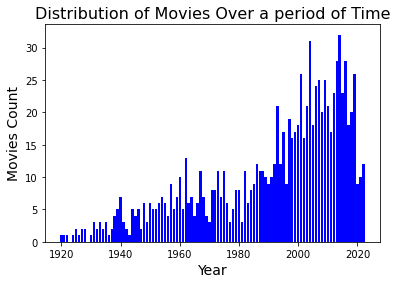

In [ ]:
df['Year']=df['Year'].astype(int)

movie_distribution= df.groupby('Year').size().to_frame('MoviesCount')

figure1, ax = plt.subplots()

ax.bar(movie_distribution.index,
        movie_distribution['MoviesCount'],
        color="blue")
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("Movies Count",
              fontsize=14)
plt.title('Distribution of Movies Over a period of Time', fontsize=16)
plt.show()

**Show the distribution of Scores and film critic ratings (Metascore) on a single chart.**

We have converted the Values in Rating Column and then we plotted the Meta_Score and Rating columns by using sns plots.

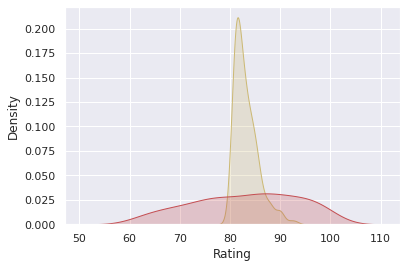

In [ ]:
fig = sns.kdeplot(df['Rating']*10, shade=True, color="y")
fig = sns.kdeplot(df['Meta_Score'], shade=True, color="r")



plt.show()


**Create a chart to display the genres of movies (top 5) that have the longest duration (minutes).**

We sorted our DataFrame by Span(mins) in Descending Order then we plotted the Genre and Span(mins) values for the first 5 rows.


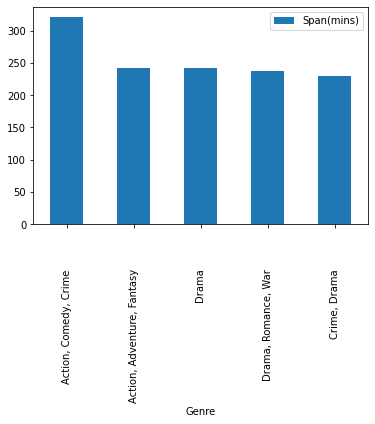

In [ ]:
 df=df.sort_values(['Span(mins)'],ascending=False)
af=df[['Genre','Span(mins)']].head(5)
af.plot(kind="bar",x="Genre")

**Create 3 additional analyses or your choice that you believe provide more insight into the data.**

**1.Count of Movies for Different Rating**

We have created a histo Plot by giving Rating column in X-axis which gave us the frequency of each Rating.



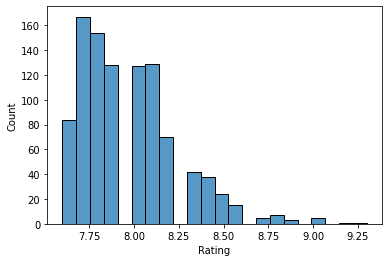

In [ ]:
sns.histplot(data=df, x = "Rating")

**Meta_Score with Gross**

We have created a Scatter Plot for Gross and Meta_Score to see the relationship between Gross and Meta_Score. Gross is not depending on the Meta_Score. If Gross is low Meta_Score might be High or Low.

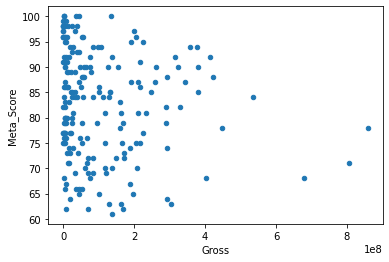

In [ ]:
df.plot(kind='scatter', x='Gross', y='Meta_Score')

**Frequency of Meta_Score**

We have plot a hist plot by dropping the NA's from Meta_Score column to analyze which Meta_Score was frequent among the movies.

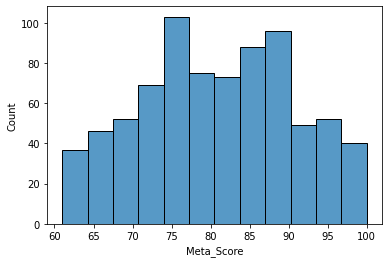

In [ ]:
df['Meta_Score'] = df['Meta_Score'].dropna()
sns.histplot(df['Meta_Score'])

# (3.) Bivariate Analysis

You must use two different types of plots to answer the questions in this section.

**Is there a  relationship between revenue and IMDB Score?**

We have plot a box plot and Scatter plot to see the relationship between Gross and Rating. From our Analysis if Gross is High Rating may be High or Low.

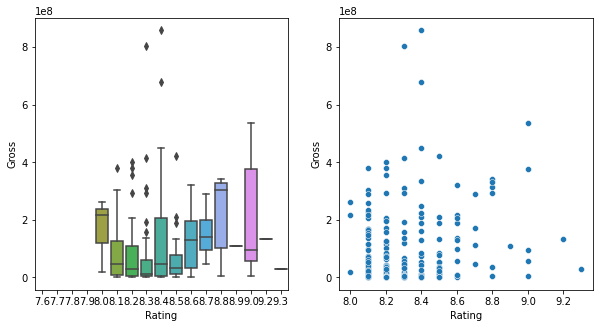

In [ ]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
# data = pd.read_csv("/content/C:\Documents\dataframe.csv")

# df = pd.DataFrame(data,columns)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
# # plot the dataframe
#df.boxplot(by="Rating", column=["Gross"])
sns.boxplot(x="Rating",y="Gross",data=df,ax=ax[0])
#sns.stripplot(x="Rating",y="Gross",data=df,ax=ax[1])
sns.scatterplot(x="Rating",y="Gross",data=df,ax=ax[1])
# # print bar graph
# mp.show()


**Create a chart and show the relationship between the Metascore and the IMDB score.**

We have plot a box plot and Scatter plot to see the relationship between Meta_Score and Rating. From our Analysis if Meta_Score is High Rating may be High or Low.

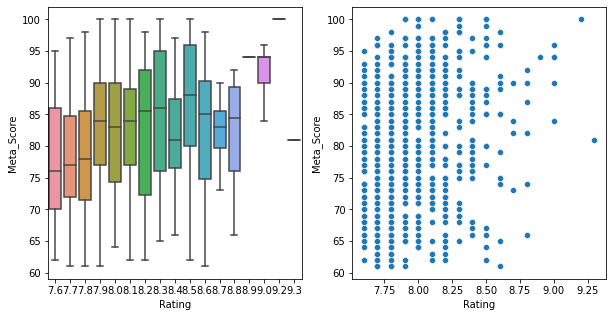

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.boxplot(x="Rating",y="Meta_Score",data=df,ax=ax[0])

sns.scatterplot(x="Rating",y="Meta_Score",data=df,ax=ax[1])

**Create 2 more charts if your choice that show the relationships between any variables of your choice.**

(1) We have plot a box plot and Scatter plot for Rating and Span(mins) and to see the relationship between Span(mins) and Rating. From our Analysis if Span(mins) is high Rating maybe High or Low.

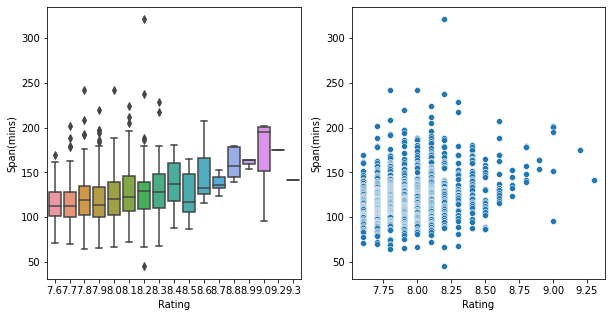

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.boxplot(x="Rating",y="Span(mins)",data=df,ax=ax[0])

sns.scatterplot(y="Span(mins)",x="Rating",data=df,ax=ax[1])



**Count of Movies with certificate**

We have plotted a barplot Movies Count and the Certificate.
From our Analysis most of the movies are R-Certified.

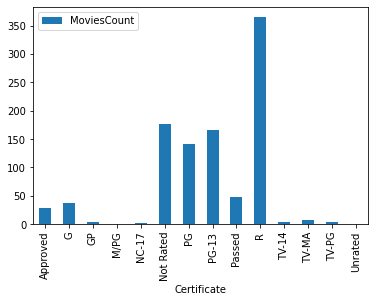

In [ ]:
movie_distribution= df.groupby('Certificate').size().to_frame('MoviesCount')

figsize=(20,16)

movie_distribution.plot(kind="bar")

# (4.) Text Analysis

**Excluding stopwords, what are the 10 most popular words used in movie titles?**

We have imported nltk package into Google Colab to get Stopwords, word_tokenize and Counter Function.We have converted each title to lower case and removed Stopped Words from our title Column. Then we used Counter function and most_common to get the most popular words from movie title.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['title_without_stopwords'] = df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))
Counter(" ".join(df['title_without_stopwords']).split()).most_common(10)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('MAN', 18),
 ('STORY', 11),
 ('2', 11),
 ('STAR', 10),
 ('DAY', 9),
 ('TIME', 8),
 ('BLOOD', 7),
 ('GIRL', 7),
 ('DRAGON', 7),
 ('HARRY', 7)]

**Do movies with longer descriptions generate more revenue or have higher Metascores?**

We created 2 bar plots and one correlation matrix to see if there is relationship between Gross,Meta_Score and Description Count. From our Analysis we found that the relation between those is not that significant.

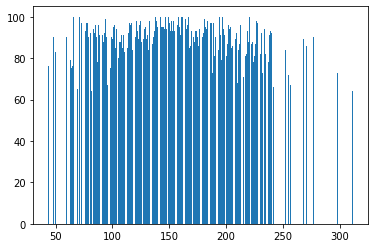

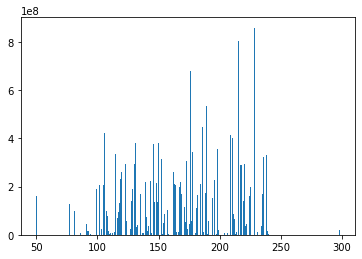

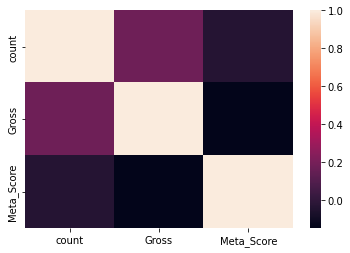

               count     Gross  Meta_Score
count       1.000000  0.176312   -0.032789
Gross       0.176312  1.000000   -0.147459
Meta_Score -0.032789 -0.147459    1.000000


In [ ]:
df["count"] = df["Description"].apply(len)
import matplotlib.pyplot as plt
x = df['count']
y=df['Meta_Score']
plt.bar(x, y, label = "count vs score")
plt.show()
#No since a movie with higher number of words in description(>50) has low meta score (<80)

x = df['count']
y=df['Gross']
plt.bar(x, y, label = "count vs score")
plt.show()
#No since a movie with higher number of words in description(>45) has low revenue (<200000000)


import seaborn as sns
df_l=pd.DataFrame(df,columns=['count','Gross','Meta_Score'])
corre=df_l.corr()

sns.heatmap(corre)
plt.show()
print(corre)

**Installing VaderSentiment Package**

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Are there differences in sentiment of the description across genres?**

We have used VaderSentiment Package to get the Sentiment Score for each description. Then we plotted sentiment score and Genre where we can see that te sentiment score is different across Genres.

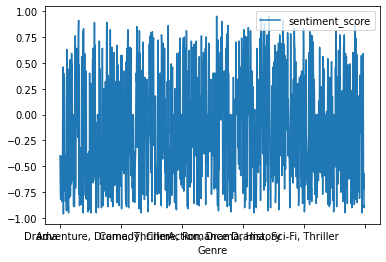

In [ ]:
import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['Description']]
df['sentiment_score'] = polarity
df

df.plot(y='sentiment_score',x='Genre')

**Create 3 word clouds using the description column: one for each of the top 3 most popular genres.**

We have used WordCloud package to generate word cloud for Description of top 3 Genres.

Word Cloud for Drama Genre:


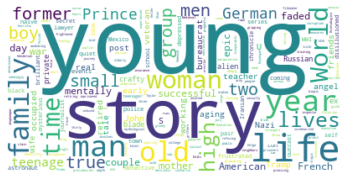

Word Cloud for Drama, Romance Genre:


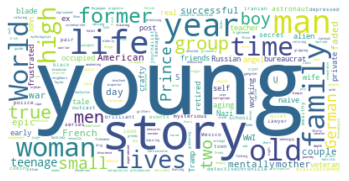

Word Cloud for Comedy,Drama Genre:


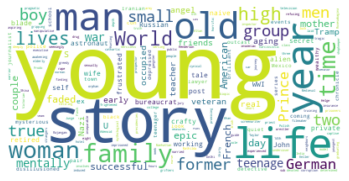

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

df_drama = df[df['Genre'].str.contains('Drama')]
text = " ".join(i.split()[1] for i in df_drama.Description)
word_cloud = WordCloud(collocations = False, background_color='White').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
print('Word Cloud for Drama Genre:')
plt.show()

df_drama2 = df[df['Genre'].str.contains('Drama, Romance')]
text = " ".join(i.split()[1] for i in df_drama.Description)
word_cloud = WordCloud(collocations = False, background_color='White').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
print('Word Cloud for Drama, Romance Genre:')
plt.show()

df_drama2 = df[df['Genre'].str.contains('Comedy, Drama')]
text = " ".join(i.split()[1] for i in df_drama.Description)
word_cloud = WordCloud(collocations = False, background_color='White').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
print('Word Cloud for Comedy,Drama Genre:')
plt.show()


**Are there any interesting relationships between the text column and any of the other variables in your dataset?**

**Time span of movie vs Description length**

We have plotted a Scatter plot for Span(mins).From our Analysis the Average Span(mins) lies in between 150.

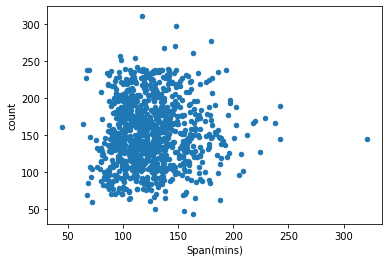

In [ ]:
df.plot(kind="scatter",y='count',x='Span(mins)')


# (5.) Comparative Analysis

**Pick any two decades and do a comprehensive comparative analysis of movies in those two decades.**

**Your analysis must address at least 5 interesting questions. None of the questions can be those listed in the EDA section of this document.**






(1) We have plotted a Scatter plot for sentiment_score and Meta_Score.To see if the movies with high Meta_Score has positive Sentiment. There is no significant relation between Meta_Score and sentiment_score.

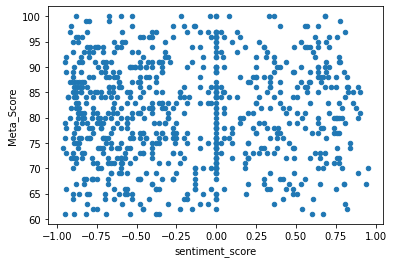

In [ ]:

df.plot(kind='scatter', y='Meta_Score', x='sentiment_score' )


(2) We have plot a Scatter plot for Span(mins) and Year. From our Analysis in years 1920 to 1980 the Span(mins) is Low. Later, from 2000 - 2020 the Average Span(mins) lies in between 100-150.

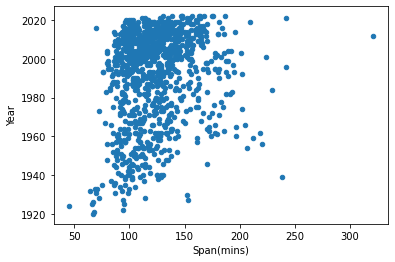

In [ ]:
df.plot(kind='scatter', y='Year', x='Span(mins)' )


(3) Here we have plot a Line chart, by considering the votes of movie and Span(mins) of movie. Movies with Span(mins) closer to 150 has the highest number of Votes.

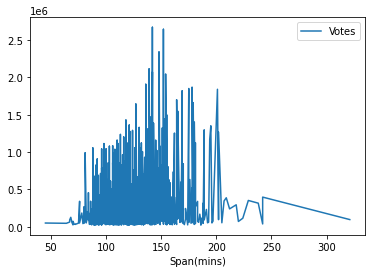

In [ ]:
df.plot(kind="line",x='Span(mins)',y='Votes')

(4)We have plotted a barplot Movies Count and the Certificate.
From our Analysis most of the movies are R-Certified.

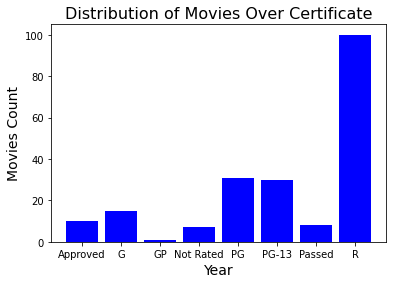

In [ ]:
movie_distribution= df.groupby('Certificate').size().to_frame('MoviesCount')

figure1, ax = plt.subplots()

ax.bar(movie_distribution.index,

        movie_distribution['MoviesCount'],

        color="blue")

ax.set_xlabel("Year", fontsize = 14)

ax.set_ylabel("Movies Count",

              fontsize=14)

plt.title('Distribution of Movies Over Certificate', fontsize=16)

plt.show()

(5)**relationship between Meta_Score and Votes**

We have plotted a barplot to show the relationship between Meta_Score and Number of Votes. Their relationship is not accurate.

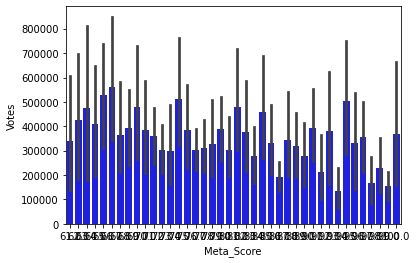

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("/content/C:\Documents\dataframe.csv")
df = pd.DataFrame(data)
sns.barplot(x=df['Meta_Score'],y=df['Votes'],color='Blue')

# (6.) Multivariate Analysis

**Create a regression model to determine which of the following variables predicts revenue**

**Number of words in a title, Number of Words in the Description,Score, Metascore, Vote and Runtime**

We have import the packages of pandas, altair, numpy, seaborn and matplotlib

In [ ]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Installation of tools package**

In [ ]:
pip install tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 3.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46756 sha256=e36fe91f8b16af9099bd42de4684970a7bbe7d7ffbed9fdc3d19a01b92a6d4d3
  Stored in directory: /root/.cache/pip/wheels/32/1d/cf/79f7c34d89f48a22675cab67291ab11cbffca2ba048ffeead7
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32537 sha256=d6af7cb333090506c144eed7a95801c7b4c2decd83917aea4d59e8ee1dab9b3a
  Stored in directory: /root/.cache/pip/wheels/00/4f/f7/f1bfb6173f342b29324a475a194327ed195a692afaab32ec4b
Successfully built tools pytils


In [ ]:
from pandas.plotting import scatter_matrix

We have count the number of words of title by using str.len() function and gave the column name as Title_Count

In [ ]:
df['Title_Count'] = df['Title'].str.len()
df

,Year,Rating,Span(mins),Genre,Certificate,Meta_Score,Description,Title,Director,Votes,Gross,Top_250,sentiment_score,count,Title_Count
0,1994,9.3,142,Drama,R,81.0,Two imprisoned men bond over a number of years...,THE SHAWSHANK REDEMPTION,Frank Darabont,2671174,28340000.0,[[#1]],-0.40,118,24
1,1972,9.2,175,"Crime, Drama",R,100.0,The aging patriarch of an organized crime dyna...,THE GODFATHER,Francis Ford Coppola,1851250,134970000.0,[[#2]],-0.67,149,13
2,2008,9.0,152,"Action, Crime, Drama",PG-13,84.0,When the menace known as the Joker wreaks havo...,THE DARK KNIGHT,Christopher Nolan,2643995,534860000.0,[[#3]],-0.82,189,15
3,2003,9.0,201,"Action, Adventure, Drama",PG-13,94.0,Gandalf and Aragorn lead the World of Men agai...,THE LORD OF THE RINGS: THE RETURN OF THE KING,Peter Jackson,1840971,377850000.0,[[#7]],-0.40,146,45
4,1993,9.0,195,"Biography, Drama, History",R,94.0,"In German-occupied Poland during World War II,...",SCHINDLER'S LIST,Steven Spielberg,1352283,96900000.0,[[#6]],-0.60,178,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1954,7.6,113,"Comedy, Drama, Romance",Passed,72.0,A playboy becomes interested in the daughter o...,SABRINA,Billy Wilder,65887,NaN,[],0.59,142,7
996,1953,7.6,118,"Drama, Romance, War",Passed,85.0,"At a U.S. Army base in 1941 Hawaii, a private ...",FROM HERE TO ETERNITY,Fred Zinnemann,47621,NaN,[],-0.72,175,21
997,1937,7.6,83,"Animation, Adventure, Family",Approved,95.0,Exiled into the dangerous forest by her wicked...,SNOW WHITE AND THE SEVEN DWARFS,William Cottrell,200964,NaN,[],-0.57,140,31
998,1935,7.6,86,"Crime, Mystery, Thriller",Approved,93.0,A man in London tries to help a counter-espion...,THE 39 STEPS,Alfred Hitchcock,57782,NaN,[],-0.90,219,12


We have count the number of words of Description by using str.len() function and gave the column name as Description_Count

In [ ]:
df['Description_Count'] = df['Description'].str.len()
df

,Year,Rating,Span(mins),Genre,Certificate,Meta_Score,Description,Title,Director,Votes,Gross,Top_250,sentiment_score,count,Title_Count,Description_Count
0,1994,9.3,142,Drama,R,81.0,Two imprisoned men bond over a number of years...,THE SHAWSHANK REDEMPTION,Frank Darabont,2671174,28340000.0,[[#1]],-0.40,118,24,118
1,1972,9.2,175,"Crime, Drama",R,100.0,The aging patriarch of an organized crime dyna...,THE GODFATHER,Francis Ford Coppola,1851250,134970000.0,[[#2]],-0.67,149,13,149
2,2008,9.0,152,"Action, Crime, Drama",PG-13,84.0,When the menace known as the Joker wreaks havo...,THE DARK KNIGHT,Christopher Nolan,2643995,534860000.0,[[#3]],-0.82,189,15,189
3,2003,9.0,201,"Action, Adventure, Drama",PG-13,94.0,Gandalf and Aragorn lead the World of Men agai...,THE LORD OF THE RINGS: THE RETURN OF THE KING,Peter Jackson,1840971,377850000.0,[[#7]],-0.40,146,45,146
4,1993,9.0,195,"Biography, Drama, History",R,94.0,"In German-occupied Poland during World War II,...",SCHINDLER'S LIST,Steven Spielberg,1352283,96900000.0,[[#6]],-0.60,178,16,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1954,7.6,113,"Comedy, Drama, Romance",Passed,72.0,A playboy becomes interested in the daughter o...,SABRINA,Billy Wilder,65887,NaN,[],0.59,142,7,142
996,1953,7.6,118,"Drama, Romance, War",Passed,85.0,"At a U.S. Army base in 1941 Hawaii, a private ...",FROM HERE TO ETERNITY,Fred Zinnemann,47621,NaN,[],-0.72,175,21,175
997,1937,7.6,83,"Animation, Adventure, Family",Approved,95.0,Exiled into the dangerous forest by her wicked...,SNOW WHITE AND THE SEVEN DWARFS,William Cottrell,200964,NaN,[],-0.57,140,31,140
998,1935,7.6,86,"Crime, Mystery, Thriller",Approved,93.0,A man in London tries to help a counter-espion...,THE 39 STEPS,Alfred Hitchcock,57782,NaN,[],-0.90,219,12,219


We have plotted a Scatter_matrix plot for Rating,Span(mins), Meta_Score,Votes.

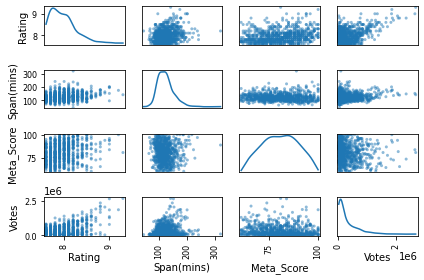

In [ ]:
pd.plotting.scatter_matrix(df1.loc[:, "Rating":"Votes"], diagonal="kde")
plt.tight_layout()
plt.show()

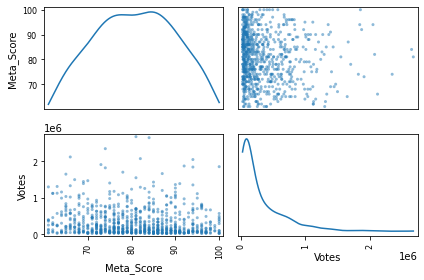

In [ ]:
pd.plotting.scatter_matrix(df1.loc[:, "Meta_Score":"Votes"], diagonal="kde")
plt.tight_layout()
plt.show()

We have taken the Span(mins) and Meta_Score. From our Analysis Average Meta_Score is in between 8.0 to 8.3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


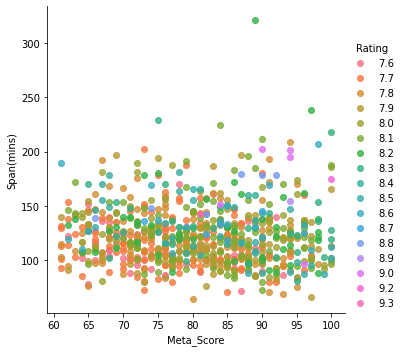

In [ ]:
sns.lmplot("Meta_Score", "Span(mins)", data, hue="Rating", fit_reg=False);

Here is the Regression model for Multi Variate Analysis. We have import the linear_model for sklearn and import the statsmodels.api.

From our Analysis we have done a linear regression model for Multi Variate Analysis where R-Squared Value is not the significant and the P- Value is high than the expected so this model is not relevant.

In [ ]:
from sklearn import linear_model

import statsmodels.api as sm

df=df.dropna()

x = df[['Title_Count','Description_Count','Meta_Score','Votes','Span(mins)']]

y = df['Gross']

np.isnan(df["Title_Count"]).any(),np.isnan(df["Gross"]).any(), np.isnan(df["Description_Count"]).any(), np.isnan(df["Meta_Score"]).any(),

np.isnan(df["Votes"]).any(), np.isnan(df["Span(mins)"]).any()

regr = linear_model.LinearRegression()

regr.fit(x, y)

print('Intercept: \n', regr.intercept_)

print('Coefficients: \n', regr.coef_)

# with statsmodels

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

predictions = model.predict(x)

print_model = model.summary()

print(print_model)



Intercept: 
 -60894138.68110368
Coefficients: 
 [ 1.12048448e+06  5.10192178e+05 -4.59550357e+05  1.24908490e+02
  9.08189561e+04]
                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     14.43
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           4.91e-12
Time:                        22:36:41   Log-Likelihood:                -4042.0
No. Observations:                 202   AIC:                             8096.
Df Residuals:                     196   BIC:                             8116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
